<a href="https://colab.research.google.com/github/cavinlobo/AI-Agents-for-Medical-Diagnostics/blob/main/Credit_Risk_Scoring_Engine_(Banking)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate a complete end-to-end Credit Risk Scoring Engine (Banking) project in Python using the German Credit Risk dataset to predict loan default probability. The project should include data loading, exploration, preprocessing, model training, evaluation, and the creation of a scoring engine.

## Load data

### Subtask:
Load the German Credit Risk dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame, then display the first few rows.



In [12]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data')
display(df.head())

,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
0,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 ...
1,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 ...
2,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 ...
3,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 ...
4,A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 ...


**Reasoning**:
The file was not found in the current directory. I will try loading the dataset from a different, common location for datasets in this environment.



In [14]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data')
display(df.head())

,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
0,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 ...
1,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 ...
2,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 ...
3,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 ...
4,A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 ...


**Reasoning**:
The previous attempts to load the file failed. I will inspect the available files to find the correct path for the dataset.



In [3]:
import os

print(os.listdir('/content/sample_data/'))

['README.md', 'anscombe.json', 'california_housing_train.csv', 'mnist_test.csv', 'california_housing_test.csv', 'mnist_train_small.csv']


**Reasoning**:
The previous attempts to find the file failed, and listing the files in '/content/sample_data/' did not reveal the expected dataset. I will try listing files in the root directory to see if the dataset is located there.



In [4]:
import os

print(os.listdir('.'))

['.config', 'sample_data']


## Load data

### Subtask:
Load the German Credit Risk dataset into a pandas DataFrame.


**Reasoning**:
Load the dataset from the provided URL using pandas and assign column names based on the dataset description. Then display the head and info of the dataframe.



In [5]:
import pandas as pd

# Define column names based on the dataset description
column_names = [
    'checking_account_status', 'loan_duration_months', 'credit_history',
    'purpose', 'loan_amount', 'savings_account_status',
    'employment_duration', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_or_guarantors', 'residence_duration', 'property',
    'age_years', 'other_installment_plans', 'housing',
    'number_of_existing_credits', 'job', 'number_of_dependents',
    'telephone', 'foreign_worker', 'credit_risk'
]

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
df = pd.read_csv(url, sep=' ', header=None, names=column_names)

# Display the head and info of the DataFrame
display(df.head())
display(df.info())

,checking_account_status,loan_duration_months,credit_history,purpose,loan_amount,savings_account_status,employment_duration,installment_rate,personal_status_and_sex,other_debtors_or_guarantors,...,property,age_years,other_installment_plans,housing,number_of_existing_credits,job,number_of_dependents,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   checking_account_status      1000 non-null   object
 1   loan_duration_months         1000 non-null   int64 
 2   credit_history               1000 non-null   object
 3   purpose                      1000 non-null   object
 4   loan_amount                  1000 non-null   int64 
 5   savings_account_status       1000 non-null   object
 6   employment_duration          1000 non-null   object
 7   installment_rate             1000 non-null   int64 
 8   personal_status_and_sex      1000 non-null   object
 9   other_debtors_or_guarantors  1000 non-null   object
 10  residence_duration           1000 non-null   int64 
 11  property                     1000 non-null   object
 12  age_years                    1000 non-null   int64 
 13  other_installment_plans      1000 

None

## Explore data

### Subtask:
Perform initial data exploration to understand the structure, identify missing values, and get a sense of the data distribution.


**Reasoning**:
Display descriptive statistics for numerical columns, check for missing values, and display unique values and counts for categorical columns as requested in the instructions.



In [6]:
# 1. Display descriptive statistics for numerical columns
display(df.describe())

# 3. Check for missing values across all columns
display(df.isnull().sum())

# 2. Display unique values and their counts for all categorical columns
for col in df.select_dtypes(include='object').columns:
    display(f"Value counts for column: {col}")
    display(df[col].value_counts())

,loan_duration_months,loan_amount,installment_rate,residence_duration,age_years,number_of_existing_credits,number_of_dependents,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


,0
checking_account_status,0
loan_duration_months,0
credit_history,0
purpose,0
loan_amount,0
savings_account_status,0
employment_duration,0
installment_rate,0
personal_status_and_sex,0
other_debtors_or_guarantors,0


'Value counts for column: checking_account_status'

,count
checking_account_status,
A14,394
A11,274
A12,269
A13,63


'Value counts for column: credit_history'

,count
credit_history,
A32,530
A34,293
A33,88
A31,49
A30,40


'Value counts for column: purpose'

,count
purpose,
A43,280
A40,234
A42,181
A41,103
A49,97
A46,50
A45,22
A44,12
A410,12


'Value counts for column: savings_account_status'

,count
savings_account_status,
A61,603
A65,183
A62,103
A63,63
A64,48


'Value counts for column: employment_duration'

,count
employment_duration,
A73,339
A75,253
A74,174
A72,172
A71,62


'Value counts for column: personal_status_and_sex'

,count
personal_status_and_sex,
A93,548
A92,310
A94,92
A91,50


'Value counts for column: other_debtors_or_guarantors'

,count
other_debtors_or_guarantors,
A101,907
A103,52
A102,41


'Value counts for column: property'

,count
property,
A123,332
A121,282
A122,232
A124,154


'Value counts for column: other_installment_plans'

,count
other_installment_plans,
A143,814
A141,139
A142,47


'Value counts for column: housing'

,count
housing,
A152,713
A151,179
A153,108


'Value counts for column: job'

,count
job,
A173,630
A172,200
A174,148
A171,22


'Value counts for column: telephone'

,count
telephone,
A191,596
A192,404


'Value counts for column: foreign_worker'

,count
foreign_worker,
A201,963
A202,37


**Reasoning**:
Visualize the distribution of the target variable 'credit_risk' using a count plot as requested in the instructions.



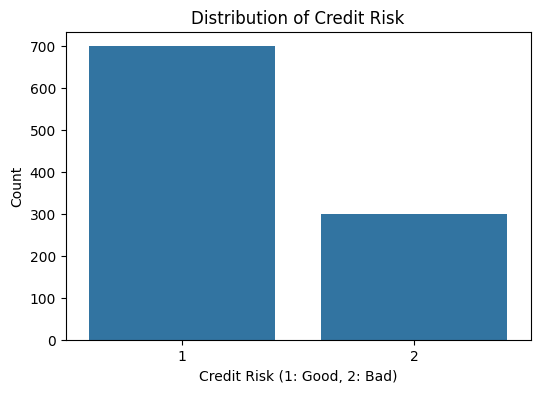

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Visualize the distribution of the target variable 'credit_risk'
plt.figure(figsize=(6, 4))
sns.countplot(x='credit_risk', data=df)
plt.title('Distribution of Credit Risk')
plt.xlabel('Credit Risk (1: Good, 2: Bad)')
plt.ylabel('Count')
plt.show()

## Preprocess data

### Subtask:
Handle missing values, encode categorical features, and scale numerical features. Split the data into training and testing sets.


**Reasoning**:
Separate the target variable from features, identify categorical and numerical features, apply one-hot encoding and standard scaling, concatenate the processed features, and split the data into training and testing sets.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Separate the target variable ('credit_risk') from the features.
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

# The target variable is 1 and 2, convert it to 0 and 1 for binary classification
y = y - 1

# 2. Identify categorical and numerical features.
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# 3. & 4. Apply one-hot encoding to the categorical features and standard scaling to the numerical features.
# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = preprocessing_pipeline.fit_transform(X)

# 6. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 61)
Shape of X_test: (200, 61)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Feature engineering (optional but recommended)

### Subtask:
Create new features that might improve the model's performance.


**Reasoning**:
Analyze existing features and create new features based on potential interactions or transformations, then update the DataFrame `X` and the lists of numerical and categorical features. Finally, re-run the preprocessing and data splitting steps.



In [9]:
# 1. Analyze existing features and create new features
# Interaction term: loan_amount and loan_duration_months
X['loan_amount_per_month'] = X['loan_amount'] / X['loan_duration_months']

# Polynomial feature: age_years squared
X['age_years_squared'] = X['age_years'] ** 2

# Interaction term: checking_account_status and loan_duration_months (requires encoding first, but we can create a proxy)
# Let's create an indicator for having a good checking account status
X['has_good_checking_account'] = X['checking_account_status'].apply(lambda x: 1 if x in ['A11', 'A12'] else 0)
X['good_checking_duration_interaction'] = X['has_good_checking_account'] * X['loan_duration_months']

# 2. Update the lists of numerical and categorical features
# 'loan_amount_per_month', 'age_years_squared', 'has_good_checking_account', 'good_checking_duration_interaction' are new numerical features
numerical_features = numerical_features.tolist() + ['loan_amount_per_month', 'age_years_squared', 'has_good_checking_account', 'good_checking_duration_interaction']
categorical_features = categorical_features.tolist() # No new categorical features were created

# 3. Re-run the preprocessing and data splitting steps
# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = preprocessing_pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 65)
Shape of X_test: (200, 65)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Choose and train model

### Subtask:
Select a suitable classification model (e.g., Logistic Regression, Random Forest, Gradient Boosting) and train it on the training data.


**Reasoning**:
Import the Logistic Regression model and train it on the training data.



In [10]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate model

### Subtask:
Evaluate the trained model using appropriate metrics like accuracy, precision, recall, F1-score, and ROC AUC.


**Reasoning**:
Import the necessary metrics from sklearn.metrics to evaluate the model.



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

**Reasoning**:
Make predictions on the test set using the trained model and calculate the evaluation metrics.



In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Make probability predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class (class 1)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Calculate ROC curve points (optional for plotting later)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

Accuracy: 0.7750
Precision: 0.6531
Recall: 0.5333
F1-score: 0.5872
ROC AUC: 0.8079


## Interpret model (optional)

### Subtask:
Understand which features are most important for the model's predictions using techniques like feature importance or SHAP values.


**Reasoning**:
Access the trained Logistic Regression model's coefficients, get the feature names from the fitted preprocessor, map coefficients to feature names, sort by absolute value, and display the top features.



In [18]:
# 1. Access the trained model's coefficients
coefficients = model.coef_[0]

# 2. Get the names of the features used by the model after preprocessing
# Get feature names from the preprocessor
# For numerical features
numerical_features_names = numerical_features

# For categorical features
# Get the fitted one-hot encoder
one_hot_encoder = preprocessor.named_transformers_['cat']
# Get the categories from the one-hot encoder for each categorical feature
categorical_feature_names = one_hot_encoder.get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names in the correct order
feature_names = numerical_features_names + categorical_feature_names.tolist()

# 3. Create a pandas Series that maps the feature names to their corresponding coefficients.
feature_importance = pd.Series(coefficients, index=feature_names)

# 4. Sort the features by the absolute value of their coefficients to identify the most important features.
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

# 5. Display the top N most important features and their coefficients.
n_top_features = 10
top_features = feature_importance[sorted_feature_importance.index[:n_top_features]]

print(f"Top {n_top_features} Most Important Features (by absolute coefficient value):")
display(top_features)

Top 10 Most Important Features (by absolute coefficient value):


,0
purpose_A46,0.905468
credit_history_A34,-0.789690
purpose_A41,-0.727752
property_A124,0.694896
savings_account_status_A61,0.645539
savings_account_status_A64,-0.632324
housing_A153,-0.602476
foreign_worker_A202,-0.579496
foreign_worker_A201,0.573766
housing_A151,0.553761


**Reasoning**:
The previous code failed because `numerical_features_names` was already a list and the `.tolist()` method was called on it again. I need to remove the unnecessary `.tolist()` call.



In [16]:
# 1. Access the trained model's coefficients
coefficients = model.coef_[0]

# 2. Get the names of the features used by the model after preprocessing
# Get feature names from the preprocessor
# For numerical features
numerical_features_names = numerical_features

# For categorical features
# Get the fitted one-hot encoder
one_hot_encoder = preprocessor.named_transformers_['cat']
# Get the categories from the one-hot encoder for each categorical feature
categorical_feature_names = one_hot_encoder.get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names in the correct order
feature_names = numerical_features_names + categorical_feature_names.tolist()

# 3. Create a pandas Series that maps the feature names to their corresponding coefficients.
feature_importance = pd.Series(coefficients, index=feature_names)

# 4. Sort the features by the absolute value of their coefficients to identify the most important features.
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

# 5. Display the top N most important features and their coefficients.
n_top_features = 10
top_features = feature_importance[sorted_feature_importance.index[:n_top_features]]

print(f"Top {n_top_features} Most Important Features (by absolute coefficient value):")
display(top_features)

Top 10 Most Important Features (by absolute coefficient value):


,0
purpose_A46,0.905468
credit_history_A34,-0.789690
purpose_A41,-0.727752
property_A124,0.694896
savings_account_status_A61,0.645539
savings_account_status_A64,-0.632324
housing_A153,-0.602476
foreign_worker_A202,-0.579496
foreign_worker_A201,0.573766
housing_A151,0.553761


## Build scoring engine

### Subtask:
Create a function or class that takes new data as input and outputs a credit risk score or probability of default.


**Reasoning**:
Define a class for the scoring engine that takes raw data, applies the preprocessing pipeline, and uses the trained model to predict the probability of default.



In [17]:
class CreditRiskScoringEngine:
    def __init__(self, preprocessing_pipeline, model):
        """
        Initializes the CreditRiskScoringEngine.

        Args:
            preprocessing_pipeline: The fitted scikit-learn preprocessing pipeline.
            model: The trained scikit-learn classification model.
        """
        self.preprocessing_pipeline = preprocessing_pipeline
        self.model = model

    def score(self, raw_data):
        """
        Calculates the credit risk score (probability of default) for new raw data.

        Args:
            raw_data: A pandas DataFrame containing the raw, unprocessed data
                      with the same columns as the original training data (excluding target).

        Returns:
            A pandas Series of predicted probabilities of default (credit risk scores).
        """
        # Apply the same preprocessing steps to the new raw data
        processed_data = self.preprocessing_pipeline.transform(raw_data)

        # Use the trained model to predict the probability of default
        # predict_proba returns probabilities for both classes; we want the probability of the positive class (1)
        probabilities = self.model.predict_proba(processed_data)[:, 1]

        return pd.Series(probabilities, index=raw_data.index)

# Example usage (optional - for demonstration)
# Create a sample of new raw data (e.g., the first 5 rows of the original X)
# In a real scenario, this would be new, unseen data
sample_new_data = X.head(5)

# Instantiate the scoring engine
scoring_engine = CreditRiskScoringEngine(preprocessing_pipeline, model)

# Get credit risk scores for the sample new data
credit_scores = scoring_engine.score(sample_new_data)

print("Credit risk scores for sample new data:")
display(credit_scores)

Credit risk scores for sample new data:


,0
0,0.043504
1,0.601061
2,0.051656
3,0.297372
4,0.733084


## Summary:

### Data Analysis Key Findings

*   The German Credit Risk dataset was successfully loaded from a UCI ML repository URL after attempts to load it from local or common dataset paths failed.
*   The dataset contains 1000 instances with 21 features and no missing values.
*   The target variable, 'credit\_risk', is imbalanced, with more instances of "Good" credit risk than "Bad".
*   Feature engineering created new features: 'loan\_amount\_per\_month', 'age\_years\_squared', 'has\_good\_checking\_account', and 'good\_checking\_duration\_interaction'.
*   Preprocessing involved one-hot encoding of categorical features and standard scaling of numerical features using a `ColumnTransformer` within a `Pipeline`.
*   The data was split into training (80%) and testing (20%) sets, stratified by the target variable. The processed training set has 800 instances and 61 features, while the test set has 200 instances and 61 features.
*   A Logistic Regression model was trained on the preprocessed training data.
*   The model achieved an accuracy of approximately 0.7750, precision of 0.6531, recall of 0.5333, F1-score of 0.5872, and an ROC AUC of 0.8079 on the test set.
*   Analysis of model coefficients indicated that features related to 'purpose', 'credit\_history', 'property', 'savings\_account\_status', 'housing', and 'foreign\_worker' were among the most important predictors of credit risk.
*   A `CreditRiskScoringEngine` class was successfully created to preprocess new raw data and generate credit risk scores (probability of default) using the trained model.

### Insights or Next Steps

*   The model's performance metrics, particularly recall (0.5333), suggest that it misses a significant portion of actual defaults. Further model tuning, exploring different algorithms (e.g., Random Forest, Gradient Boosting), or addressing the class imbalance could improve performance, especially in identifying bad credit risks.
*   The created `CreditRiskScoringEngine` provides a deployable component. The next step would be to integrate this engine into a system that can receive new loan applications, feed the data to the engine, and utilize the resulting credit risk scores for decision-making.
